In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import random

import itertools

from cpd_utils import *

import time
import bisect

import pandas as pd

# DCDP

In [2]:
acgh = pd.read_csv('ACGH.csv')

In [3]:
acgh

,3,4,5,6,7,8,9,10,14,15,...,45,46,47,48,49,50,51,53,54,57
0,-0.144415,-0.247427,-0.269840,-0.262579,-0.150777,-0.143706,-0.271018,-0.076668,0.101707,-0.125333,...,-0.151616,-0.101662,-0.150036,-0.055906,-0.154145,-0.188774,-0.387027,-0.233332,-0.189296,0.060505
1,0.040937,0.033958,-0.081820,-0.037547,-0.219752,-0.016050,-0.156197,0.130011,0.167675,-0.004665,...,0.007331,0.068342,0.002968,-0.018221,-0.015482,0.015241,-0.267025,-0.061994,-0.004316,0.275347
2,0.098912,0.174916,0.065181,0.082750,-0.322613,0.105298,0.117130,0.195010,0.320666,0.095665,...,0.104330,0.089667,0.106961,0.094419,-0.012803,0.093207,-0.202701,0.000000,0.108349,0.068675
3,0.100259,0.196253,0.120515,0.129426,-0.327756,0.083322,0.093687,0.234338,0.338353,0.132339,...,0.155356,0.125009,0.150966,0.107438,0.081514,0.118891,-0.198374,0.028331,0.146699,0.026637
4,0.058605,0.086212,-0.038486,0.037079,-0.137149,-0.012386,-0.028354,0.146316,0.175325,-0.054341,...,0.061612,0.089680,0.069632,-0.022873,-0.012782,0.028566,-0.231363,-0.029316,0.072673,0.084635
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2210,-0.744730,-0.585155,-1.098461,0.010455,-0.819493,-0.540821,-1.079050,-0.288961,-0.354666,-1.391780,...,0.279564,-0.109340,-0.047407,-0.098556,-0.096155,-0.086115,-0.030686,-1.185995,-0.062632,-0.960440
2211,-0.511419,-0.365419,-0.778992,0.024405,-0.587277,-0.593011,-0.655030,-0.276547,-0.192350,-0.878362,...,0.135669,-0.104628,-0.047352,-0.093840,-0.079144,-0.154130,0.013620,-0.776998,0.017358,-0.629851
2212,-0.565070,-0.453598,-0.872510,-0.014585,-0.750758,-0.611774,-0.664835,-0.258331,-0.234328,-0.887333,...,0.195621,-0.067996,-0.049091,-0.043880,-0.079428,-0.092108,-0.033711,-0.798666,-0.093645,-0.955684
2213,-0.980408,-0.956088,-1.840156,-0.072578,-1.455062,-1.725091,-0.738842,-0.475318,-0.362994,-1.814334,...,0.315993,-0.038327,-0.082036,-0.236562,0.333854,-0.095115,0.311648,-1.595007,-0.197647,-1.963646


In [4]:
nt = len(acgh.iloc[:, 0])
Y = acgh.iloc[:, np.arange(29)].values
Y_train = Y[np.arange(0, nt, 2), :]
Y_test = Y[np.arange(1, nt, 2), :]

In [5]:
print(Y_train.shape)
print(Y_test.shape)

(1108, 29)
(1107, 29)


(array([4.0000e+00, 8.0000e+00, 4.4000e+01, 2.5200e+03, 2.8365e+04,
        1.1470e+03, 2.6000e+01, 1.1000e+01, 0.0000e+00, 7.0000e+00]),
 array([-2.86665556, -2.21752643, -1.5683973 , -0.91926817, -0.27013904,
         0.37899009,  1.02811922,  1.67724836,  2.32637749,  2.97550662,
         3.62463575]),
 <a list of 10 Patch objects>)

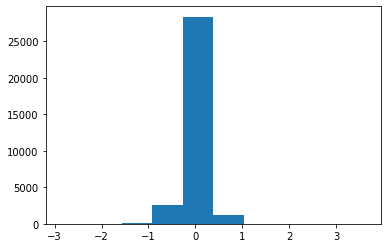

In [6]:
plt.hist(Y_train.reshape((-1,)))

In [11]:
grid_n = 200
gamma_list = [1,2,4,10]
lam_list = [0, 0.5]

run_time_dc  = 0
loc_error_dc = 0

np.random.seed(0)

print('---------- divide and conquer -----------')
start_time = time.time()
dcdp = dcdp_cv_random_mean(grid_n, lam_list, gamma_list, smooth = 5, 
             buffer = 10, step_refine = 1, buffer_refine = 5, lam_refine = 0.1)
cp_best, param_best, cp_best_cand = dcdp.fit(Y_train, Y_test)
# loc_error_dc = cp_distance(cp_best, cp_truth)
# run_time_dc = time.time() - start_time

print("loc error: {0}, time: {1}".format(loc_error_dc, run_time_dc))
print("best parameter: {0}".format(param_best))

---------- divide and conquer -----------
loc error: 0, time: 0
best parameter: (0, 4)


In [12]:
print(cp_best)
print(cp_best_cand)

[37, 67, 87, 107, 132, 171, 214, 261, 289, 329, 373, 393, 406, 436, 462, 480, 526, 571, 591, 613, 630, 644, 661, 684, 713, 767, 780, 818, 862, 897, 901, 953, 983, 1000, 1025, 1072, 1099]
[  34   75   88  105  140  168  215  259  291  330  366  389  405  437
  445  462  481  522  560  590  609  628  648  662  684  711  760  784
  821  827  832  862  887  912  952  978  998 1011 1015 1029 1037 1074
 1101]


In [13]:
len(cp_best)

37

In [10]:
# cp = np.concatenate([[0], cp_best_cand[:], [len(Y_train)]])
# beta_path = dcdp.fit_with_cp(Y_train, cp)

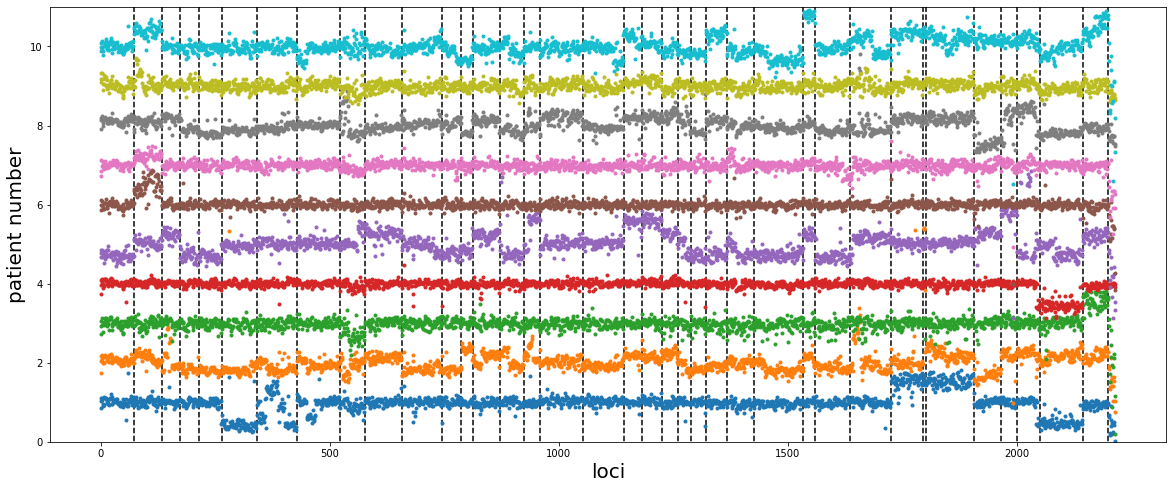

In [18]:
k = 10

fig = plt.figure(figsize = (20, 8))
plt.ylim([0, k + 1])

for i in range(k):
    plt.plot(acgh.iloc[:, i] + i + 1, '.')
    
for cp in cp_best:
    plt.vlines(2 * cp, ymin = -1, ymax = k + 1, color = 'k', linestyle = 'dashed')
    
fsize = 20
plt.xlabel('loci', fontsize = fsize)
plt.ylabel('patient number', fontsize = fsize)
plt.savefig("acgh.pdf", bbox_inches = 'tight')

### Change in covariance